In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.arima_model import ARIMA


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler


import pickle

In [2]:
df = pd.read_csv('../data/raw_recording_1.csv')
# df = df[:int(len(df) * 2/4)]

In [3]:
# df.drop(columns=['time', 'start', 'end'], inplace=True)

In [4]:
for i in range(1,500):

    df[f'channel_1_{i}'] = df['channel_1'].shift(i)
    df[f'channel_2_{i}'] = df['channel_2'].shift(i)
    df[f'channel_3_{i}'] = df['channel_3'].shift(i)
    df[f'channel_4_{i}'] = df['channel_4'].shift(i)

In [5]:
df['x_diff'] = df['x_pos'].diff()
df['y_diff'] = df['y_pos'].diff()

In [6]:
df.dropna(inplace=True)

In [7]:
df

,x_pos,y_pos,channel_1,channel_2,channel_3,channel_4,channel_1_1,channel_2_1,channel_3_1,channel_4_1,...,channel_1_498,channel_2_498,channel_3_498,channel_4_498,channel_1_499,channel_2_499,channel_3_499,channel_4_499,x_diff,y_diff
499,2149.0,1178.0,39,84,24,263,39.0,84.0,24.0,264.0,...,22.0,32.0,0.0,83.0,319.0,19.0,0.0,83.0,0.0,0.0
500,2152.0,1179.0,39,84,24,263,39.0,84.0,24.0,263.0,...,22.0,31.0,12.0,83.0,22.0,32.0,0.0,83.0,3.0,1.0
501,2152.0,1179.0,39,83,24,263,39.0,84.0,24.0,263.0,...,22.0,31.0,16.0,111.0,22.0,31.0,12.0,83.0,0.0,0.0
502,2152.0,1179.0,39,83,24,263,39.0,83.0,24.0,263.0,...,21.0,31.0,16.0,111.0,22.0,31.0,16.0,111.0,0.0,0.0
503,2156.0,1181.0,39,83,24,263,39.0,83.0,24.0,263.0,...,21.0,31.0,16.0,11.0,21.0,31.0,16.0,111.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122532,1577.0,1148.0,13,28,6,351,13.0,28.0,6.0,352.0,...,28.0,44.0,18.0,360.0,28.0,44.0,19.0,361.0,6.0,1.0
122533,1577.0,1148.0,13,28,6,351,13.0,28.0,6.0,351.0,...,28.0,44.0,18.0,359.0,28.0,44.0,18.0,360.0,0.0,0.0
122534,1581.0,1148.0,13,28,6,351,13.0,28.0,6.0,351.0,...,28.0,44.0,19.0,359.0,28.0,44.0,18.0,359.0,4.0,0.0
122535,1581.0,1148.0,13,28,6,350,13.0,28.0,6.0,351.0,...,28.0,44.0,18.0,359.0,28.0,44.0,19.0,359.0,0.0,0.0


In [8]:
X = np.array(df.drop(columns=['x_pos', 'y_pos', 'x_diff', 'y_diff']))
y = np.array(df[['x_diff', 'y_diff']])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [10]:
ab_x= GradientBoostingRegressor(n_estimators=100 ,max_depth=3, learning_rate=.1)
ab_x.fit(X_train, y_train[:,0])

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
ab_x.score(X_train, y_train[:,0]), ab_x.score(X_test, y_test[:,0])

(0.37991752110107396, -1.23948983097871)

In [14]:
ab_y= GradientBoostingRegressor(n_estimators=100 ,max_depth=3, learning_rate=.1)
ab_y.fit(X_train, y_train[:,1])

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
ab_y.score(X_train, y_train[:,1]), ab_y.score(X_test, y_test[:,1])

(0.5206788230251738, -0.17765815867399626)

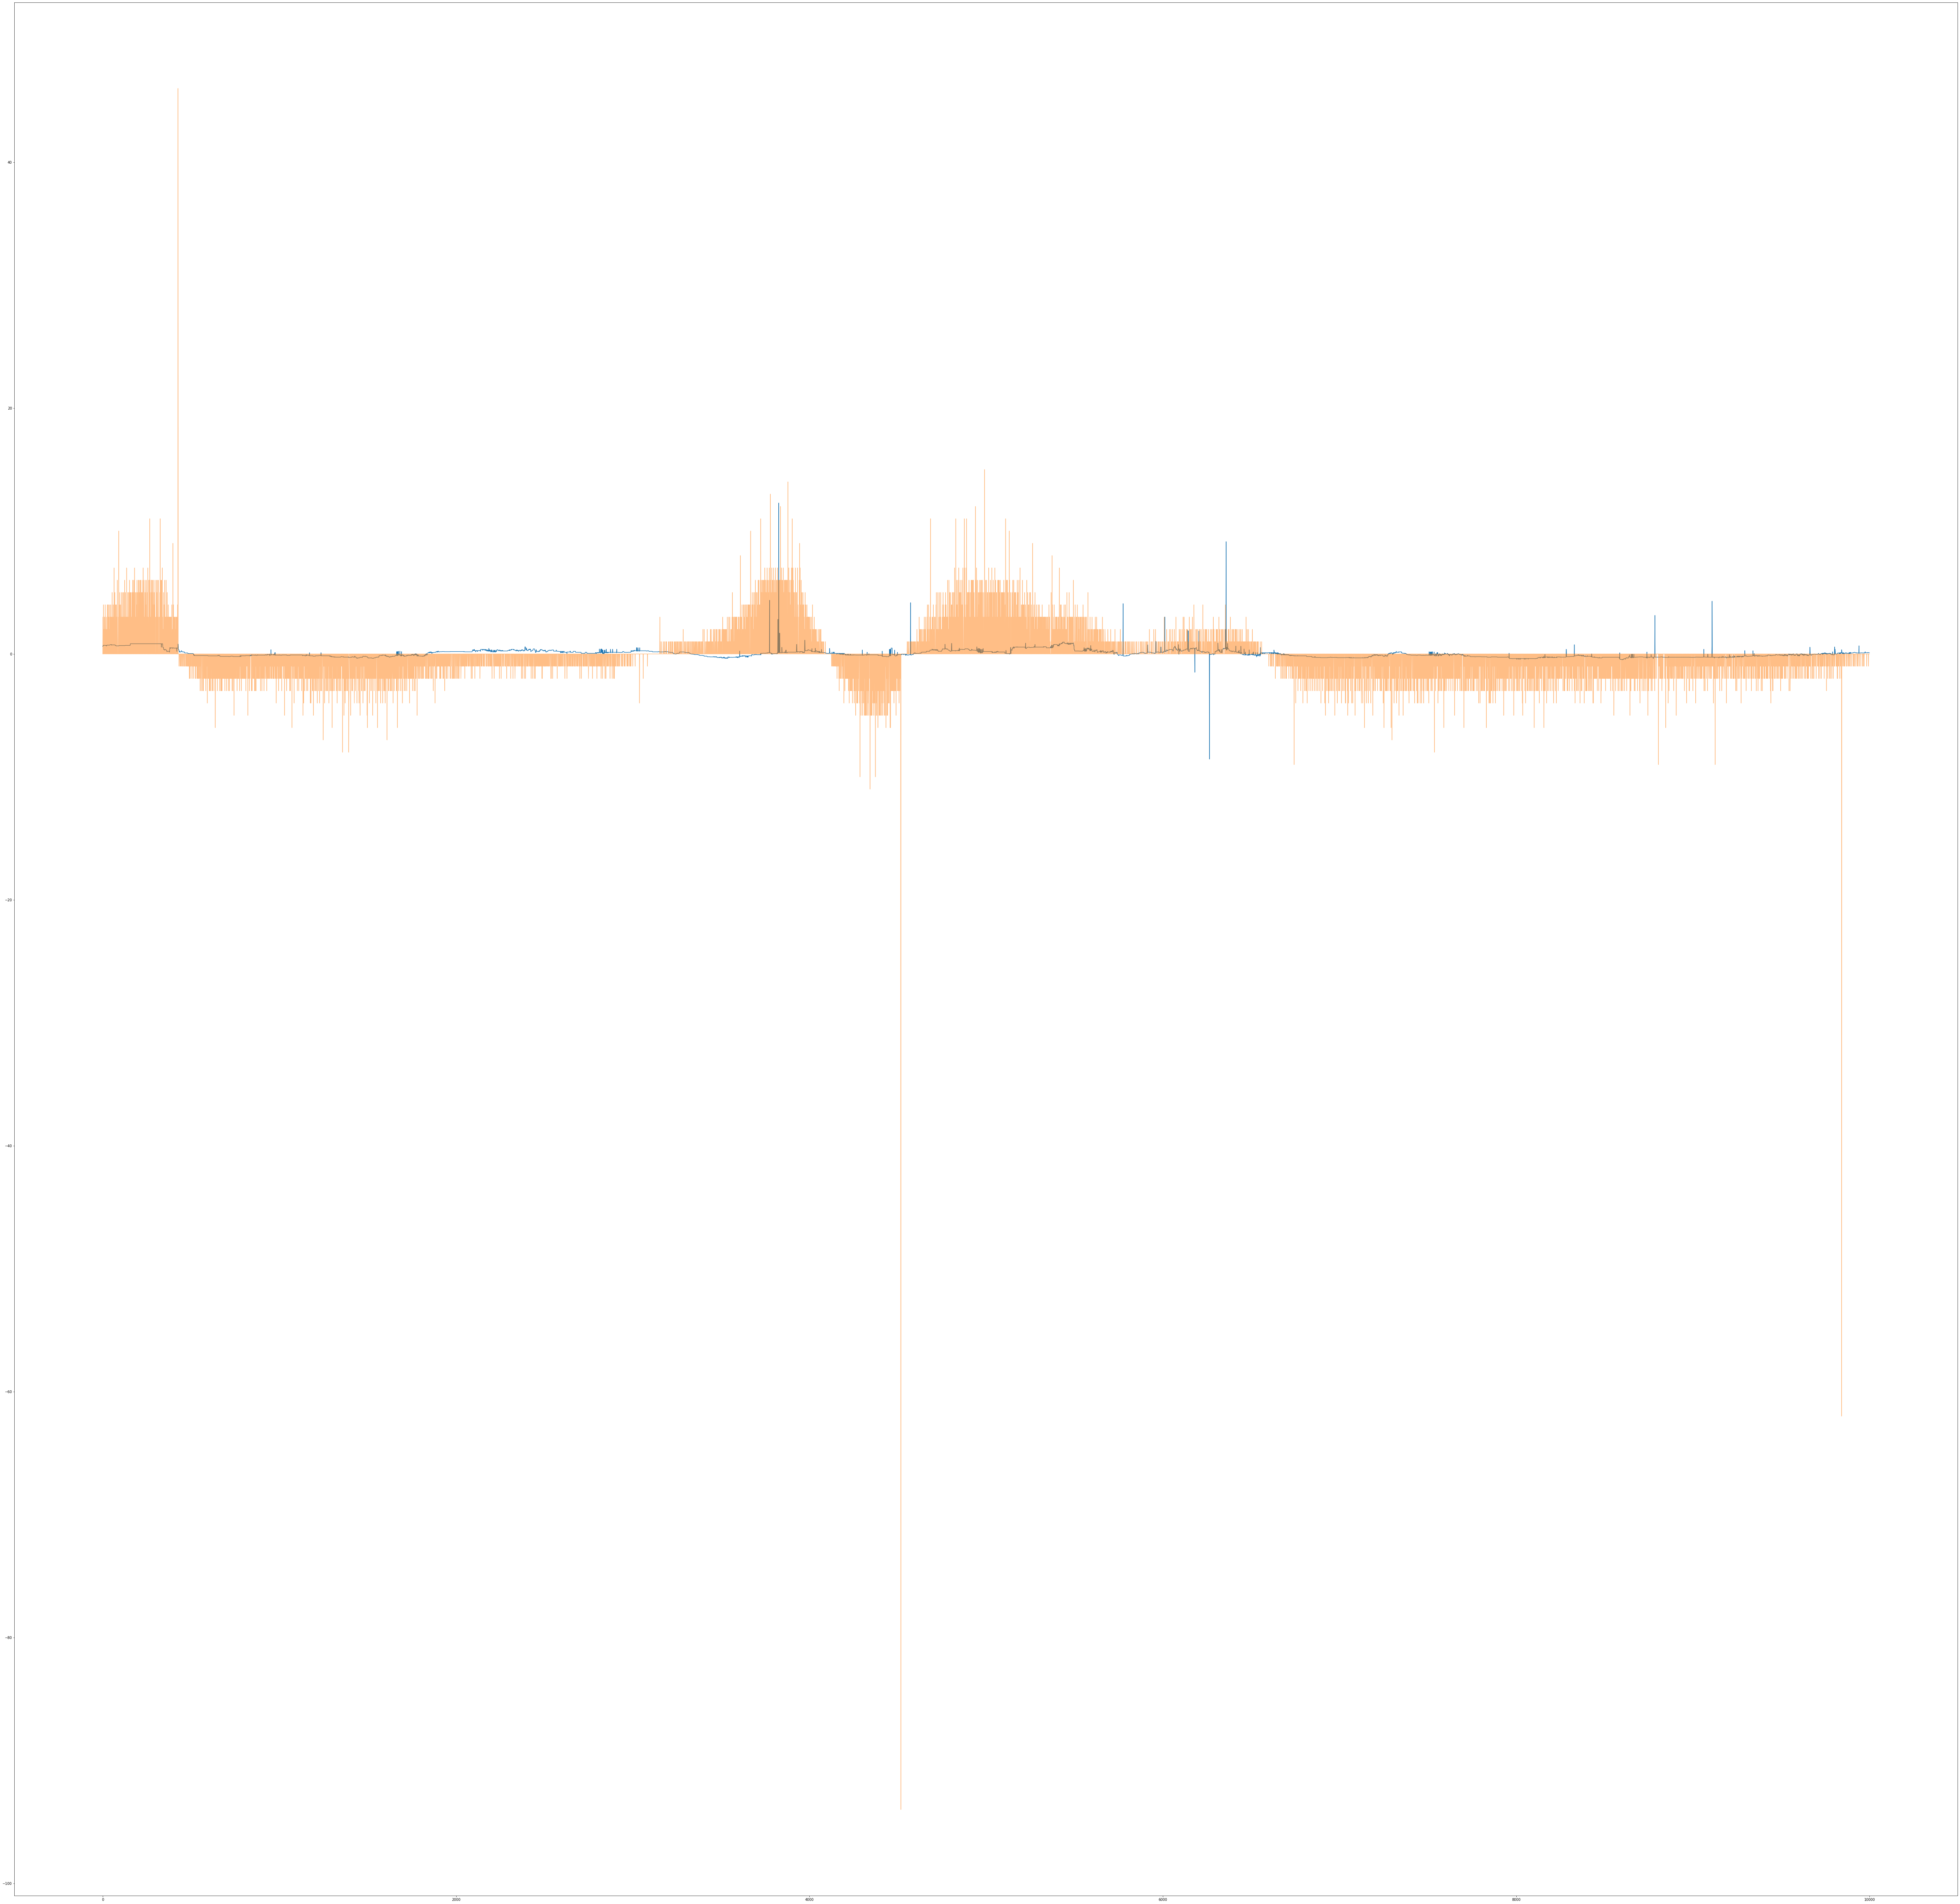

In [20]:
plt.figure(figsize=(100,100))
plt.plot(ab_x.predict(X)[:10000]);
plt.plot(y[:,0][:10000], alpha = .5);


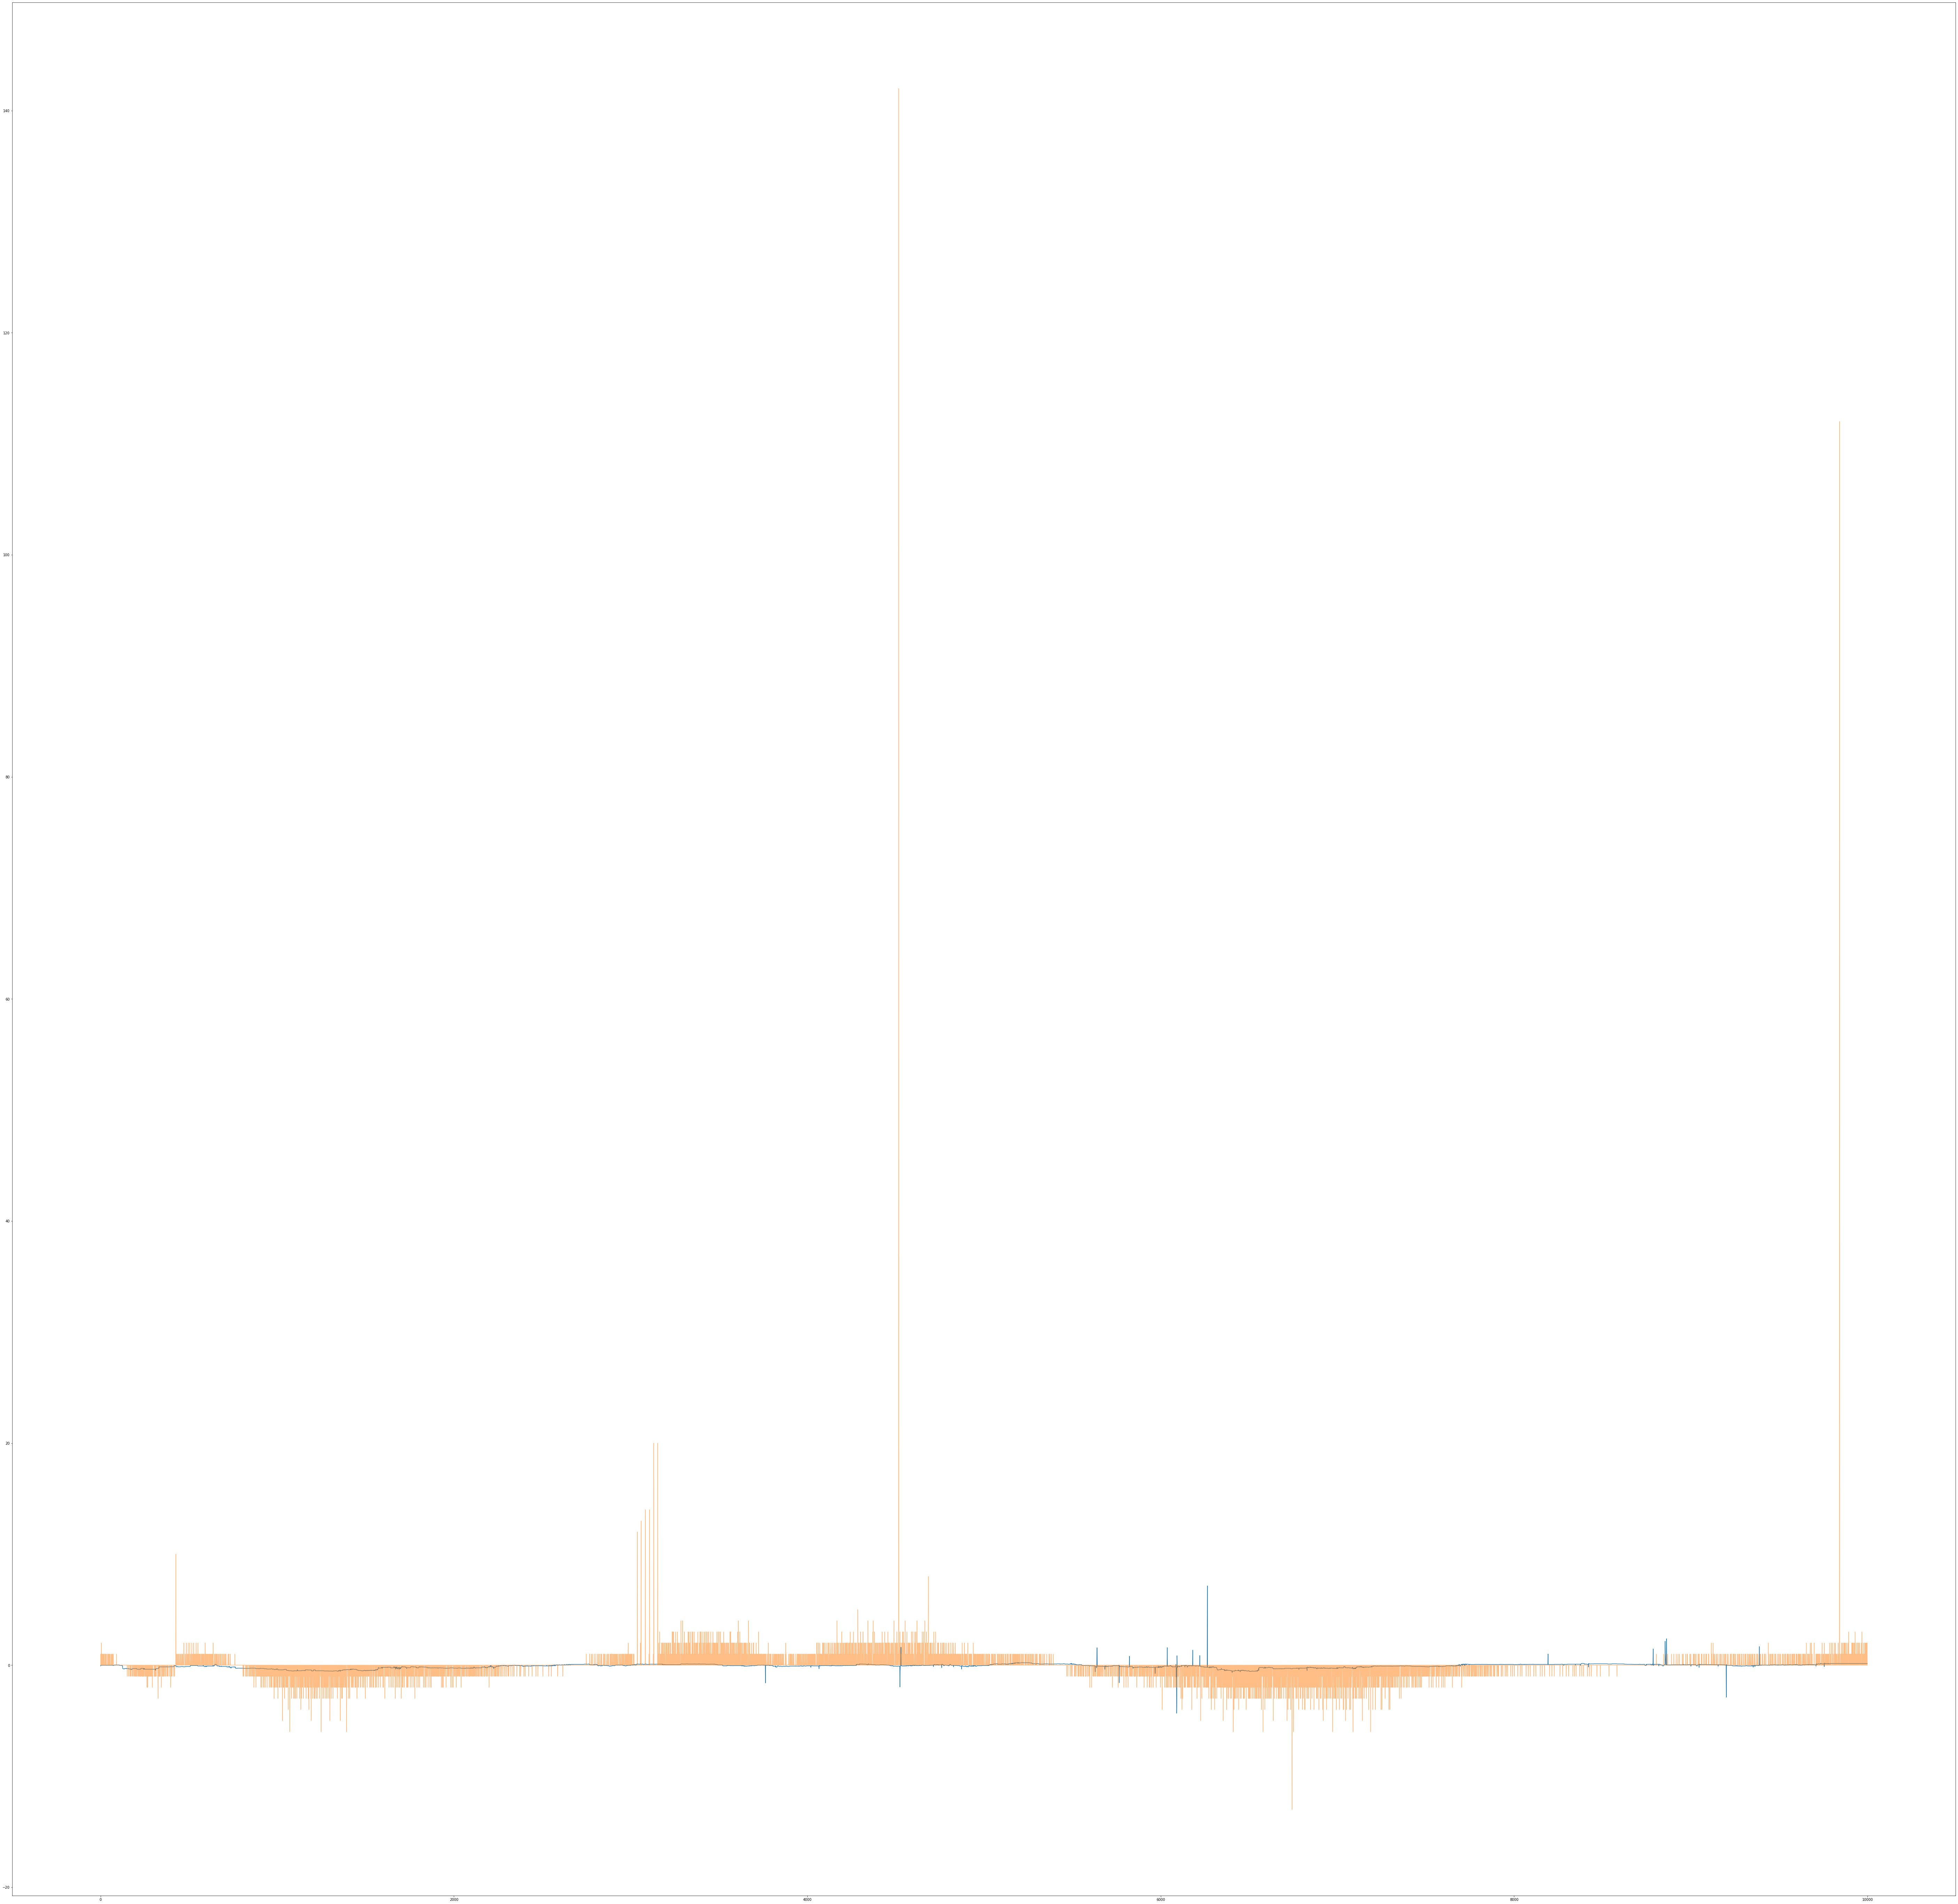

In [21]:
plt.figure(figsize=(100,100))
plt.plot(ab_y.predict(X)[:10000]);
plt.plot(y[:,1][:10000], alpha = .5);


In [22]:
with open('../pickled_models/adaboost_x.pkl', 'wb') as f:
    pickle.dump(ab_x, f)

with open('../pickled_models/adaboost_y.pkl', 'wb') as f:
    pickle.dump(ab_y, f)

